## Deep Learning

### Réseaux de neurones

#### Exercice 1 (fait avec Keras).

In [21]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [22]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


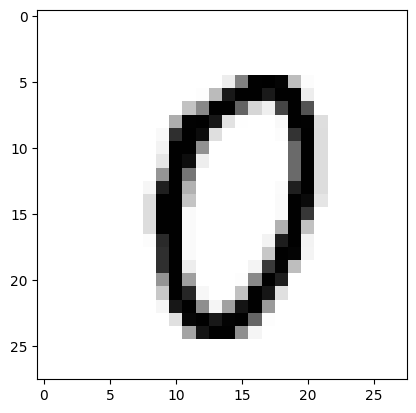

0


In [24]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
plt.imshow(X_train[1000], cmap=cm.Greys)
plt.show()

print(y_train[1000])

In [25]:
X_train  = X_train / 255
X_test  = X_test / 255
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [26]:
y_new = np.zeros(y_train.shape)
y_new[np.where(y_train==5.0)[0]] = 1
y_train = y_new

y_new = np.zeros(y_test.shape)
y_new[np.where(y_test==5.0)[0]] = 1
y_test = y_new

In [27]:
#Si vous travaillez avec tensorflow2, modifiez remplacez les deux lignes suivantes par ce qui suit :
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

1. Modifier le fichier pour implémenter ce réseau de neurones. Quelle fonction d’activation utiliseriez- vous pour la couche de sortie ?
 

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(2, activation='softmax', kernel_initializer='normal'))
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model1.summary()

2. Entrainer le réseau avec juste 10 epchos, le tester et mesurer sa précision. Peut-on améliorer encore la précision sans changer l’architecture du réseau ?

In [30]:
epochs = 10
batch_size = 128
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 0s 713us/step - loss: 0.1129 - accuracy: 0.9633 - val_loss: 0.1052 - val_accuracy: 0.9666
Epoch 2/10
469/469 [==============================] - 0s 585us/step - loss: 0.1116 - accuracy: 0.9640 - val_loss: 0.1038 - val_accuracy: 0.9671
Epoch 3/10
469/469 [==============================] - 0s 583us/step - loss: 0.1104 - accuracy: 0.9644 - val_loss: 0.1028 - val_accuracy: 0.9673
Epoch 4/10
469/469 [==============================] - 0s 596us/step - loss: 0.1094 - accuracy: 0.9649 - val_loss: 0.1018 - val_accuracy: 0.9677
Epoch 5/10
469/469 [==============================] - 0s 737us/step - loss: 0.1085 - accuracy: 0.9652 - val_loss: 0.1010 - val_accuracy: 0.9680
Epoch 6/10
469/469 [==============================] - 0s 658us/step - loss: 0.1077 - accuracy: 0.9655 - val_loss: 0.1002 - val_accuracy: 0.9682
Epoch 7/10
469/469 [==============================] - 0s 618us/step - loss: 0.1069 - accuracy: 0.9660 - val_loss: 0.0994 - val_accuracy:

In [31]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
epochs = 30
batch_size = 128
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/30
469/469 [==============================] - 0s 660us/step - loss: 0.1005 - accuracy: 0.9690 - val_loss: 0.0936 - val_accuracy: 0.9713
Epoch 2/30
469/469 [==============================] - 0s 570us/step - loss: 0.1001 - accuracy: 0.9691 - val_loss: 0.0934 - val_accuracy: 0.9713
Epoch 3/30
469/469 [==============================] - 0s 578us/step - loss: 0.0999 - accuracy: 0.9693 - val_loss: 0.0931 - val_accuracy: 0.9716
Epoch 4/30
469/469 [==============================] - 0s 631us/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0928 - val_accuracy: 0.9717
Epoch 5/30
469/469 [==============================] - 0s 583us/step - loss: 0.0993 - accuracy: 0.9694 - val_loss: 0.0926 - val_accuracy: 0.9719
Epoch 6/30
469/469 [==============================] - 0s 582us/step - loss: 0.0991 - accuracy: 0.9693 - val_loss: 0.0924 - val_accuracy: 0.9718
Epoch 7/30
469/469 [==============================] - 0s 570us/step - loss: 0.0988 - accuracy: 0.9696 - val_loss: 0.0922 - val_accuracy:

#### Exercice 2.

Attention, il faut recharger les données : 

In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

2. Redéfinir, dans le programme, la nouvelle architecture.

3. Entrainer et tester le nouveau réseau. Refaire les mêmes experimentations que dans l’exercice 1. Changer d’algorithme d’optimisation.

4. Ajouter une couche cachée avec 10 neurones, puis avec 64 neurones.

### Exercice 3

In [63]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [64]:
#On charge les bibliothèques :
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

1. Définir un réseau de neurones à convolution avec :

– une couche de convolution

– une couche de maxpooling

– un réseau "fully connected" à plusieurs couches

Et on a nos 99% 